# Train the MLP model

In [1]:
import matplotlib
matplotlib.use('nbagg')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import csv
from sklearn.cross_validation import train_test_split

from keras.models import Sequential
from keras.layers import Input, Activation, Dense
from keras import optimizers
from keras import losses

#%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


### Import CSV dataset file

In [2]:
# Load file
df_dataset = pd.read_csv('./data/dataset.csv', delimiter=';', dtype={'a': np.float32})
df_dataset.info()
df_dataset.head(n=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126792 entries, 0 to 126791
Data columns (total 41 columns):
Speed          126792 non-null float64
lidar_0d       126792 non-null float64
lidar_10d      126792 non-null float64
lidar_20d      126792 non-null float64
lidar_30d      126792 non-null float64
lidar_40d      126792 non-null float64
lidar_50d      126792 non-null float64
lidar_60d      126792 non-null float64
lidar_70d      126792 non-null float64
lidar_80d      126792 non-null float64
lidar_90d      126792 non-null float64
lidar_100d     126792 non-null float64
lidar_110d     126792 non-null float64
lidar_120d     126792 non-null float64
lidar_130d     126792 non-null float64
lidar_140d     126792 non-null float64
lidar_150d     126792 non-null float64
lidar_160d     126792 non-null float64
lidar_170d     126792 non-null float64
lidar_180d     126792 non-null float64
lidar_190d     126792 non-null float64
lidar_200d     126792 non-null float64
lidar_210d     126792 non-null 

,Speed,lidar_0d,lidar_10d,lidar_20d,lidar_30d,lidar_40d,lidar_50d,lidar_60d,lidar_70d,lidar_80d,lidar_90d,lidar_100d,lidar_110d,lidar_120d,lidar_130d,lidar_140d,lidar_150d,lidar_160d,lidar_170d,lidar_180d,lidar_190d,lidar_200d,lidar_210d,lidar_220d,lidar_230d,lidar_240d,lidar_250d,lidar_260d,lidar_270d,lidar_280d,lidar_290d,lidar_300d,lidar_310d,lidar_320d,lidar_330d,lidar_340d,lidar_350d,T_throtle,T_brake,T_steering,T_handbrake
0,0.000,0.057,0.062,0.069,0.080,0.101,0.140,0.243,0.756,1.000,0.510,0.336,0.256,0.214,0.189,0.174,0.166,0.164,0.166,0.174,0.189,0.213,0.260,0.366,0.592,1.000,1.000,0.444,0.188,0.121,0.091,0.075,0.065,0.060,0.056,0.055,0.055,0.000,0.0,0.007,0.0
1,0.000,0.057,0.062,0.069,0.080,0.101,0.140,0.243,0.756,1.000,0.510,0.336,0.256,0.214,0.189,0.174,0.166,0.164,0.166,0.174,0.189,0.213,0.260,0.366,0.592,1.000,1.000,0.444,0.188,0.121,0.091,0.075,0.065,0.060,0.056,0.055,0.055,0.000,0.0,0.000,0.0
2,0.000,0.057,0.062,0.069,0.080,0.101,0.140,0.243,0.756,1.000,0.510,0.336,0.256,0.214,0.189,0.174,0.166,0.164,0.166,0.174,0.189,0.213,0.260,0.366,0.592,1.000,1.000,0.444,0.188,0.121,0.091,0.075,0.065,0.060,0.056,0.055,0.055,0.000,0.0,0.007,0.0
3,0.000,0.057,0.062,0.069,0.080,0.101,0.140,0.243,0.756,1.000,0.510,0.336,0.256,0.214,0.189,0.174,0.166,0.164,0.166,0.174,0.189,0.213,0.260,0.366,0.592,1.000,1.000,0.444,0.188,0.121,0.091,0.075,0.065,0.060,0.056,0.055,0.055,0.000,0.0,0.007,0.0
4,0.000,0.057,0.062,0.069,0.080,0.101,0.140,0.243,0.756,1.000,0.510,0.336,0.256,0.214,0.189,0.174,0.166,0.164,0.166,0.174,0.189,0.213,0.260,0.366,0.592,1.000,1.000,0.444,0.188,0.121,0.091,0.075,0.065,0.060,0.056,0.055,0.055,0.000,0.0,0.007,0.0
5,0.000,0.057,0.062,0.069,0.080,0.101,0.140,0.243,0.756,1.000,0.510,0.336,0.256,0.214,0.189,0.174,0.166,0.164,0.166,0.174,0.189,0.213,0.260,0.366,0.592,1.000,1.000,0.444,0.188,0.121,0.091,0.075,0.065,0.060,0.056,0.055,0.055,0.000,0.0,0.007,0.0
6,0.000,0.057,0.062,0.069,0.080,0.101,0.140,0.243,0.756,1.000,0.510,0.336,0.256,0.214,0.189,0.174,0.166,0.164,0.166,0.174,0.189,0.213,0.260,0.366,0.592,1.000,1.000,0.444,0.188,0.121,0.091,0.075,0.065,0.060,0.056,0.055,0.055,0.000,0.0,0.007,0.0
7,0.000,0.057,0.062,0.069,0.080,0.101,0.140,0.243,0.756,1.000,0.510,0.336,0.256,0.214,0.189,0.174,0.166,0.164,0.166,0.174,0.189,0.213,0.260,0.366,0.592,1.000,1.000,0.444,0.188,0.121,0.091,0.075,0.065,0.060,0.056,0.055,0.055,0.000,0.0,0.007,0.0
8,0.000,0.057,0.062,0.069,0.080,0.101,0.140,0.243,0.756,1.000,0.510,0.336,0.256,0.214,0.189,0.174,0.166,0.164,0.166,0.174,0.189,0.213,0.260,0.366,0.592,1.000,1.000,0.444,0.188,0.121,0.091,0.075,0.065,0.060,0.056,0.055,0.055,0.000,0.0,0.007,0.0
9,0.000,0.057,0.062,0.069,0.080,0.101,0.140,0.243,0.756,1.000,0.510,0.336,0.256,0.214,0.189,0.174,0.166,0.164,0.166,0.174,0.189,0.213,0.260,0.366,0.592,1.000,1.000,0.444,0.188,0.121,0.091,0.075,0.065,0.060,0.056,0.055,0.055,0.000,0.0,0.007,0.0


### Convert the pandas dataframe to numpy

In [3]:
# Convert the panda dataframe to a numpy array
np_dataset = df_dataset.as_matrix(columns=None)

#print(np_dataset.shape)
for line in np_dataset:
    print line
    break


[ 0.     0.057  0.062  0.069  0.08   0.101  0.14   0.243  0.756  1.     0.51
  0.336  0.256  0.214  0.189  0.174  0.166  0.164  0.166  0.174  0.189
  0.213  0.26   0.366  0.592  1.     1.     0.444  0.188  0.121  0.091
  0.075  0.065  0.06   0.056  0.055  0.055  0.     0.     0.007  0.   ]


### Split dataset

In [4]:
# Split dataset between input data(features) x, and target data y
x = np_dataset[:, :-4]
y = np_dataset[:, -4:]

#print(x[0])
#print("\n")

#x[:, 4] /= 150.
#x[:, 5:] /= 15.
#x[:, 1] = 0.0

#print(x[0])
#print("\n")

#print(np_dataset.shape, x.shape, y.shape)
print(x)
print(x.shape)
print("\n")
print(y)
print(y.shape)


[[ 0.     0.057  0.062 ...,  0.056  0.055  0.055]
 [ 0.     0.057  0.062 ...,  0.056  0.055  0.055]
 [ 0.     0.057  0.062 ...,  0.056  0.055  0.055]
 ..., 
 [ 0.858  0.094  0.096 ...,  0.109  0.1    0.096]
 [ 0.858  0.094  0.096 ...,  0.109  0.1    0.096]
 [ 0.858  0.094  0.096 ...,  0.109  0.1    0.096]]
(126792, 37)


[[ 0.     0.     0.007  0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.007  0.   ]
 ..., 
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]]
(126792, 4)


In [5]:
# Split dataset between train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.0,
                                                    random_state=None)

print("x_train: " + str(x_train.shape))
print("y_train: " + str(y_train.shape))
print("x_test: " + str(x_test.shape))
print("y_test: " + str(y_test.shape))

print(x_train[0])
print(y_train[0])



x_train: (126792, 37)
y_train: (126792, 4)
x_test: (0, 37)
y_test: (0, 4)
[  1.49161000e+02   8.63000000e-01   8.90000000e-01   9.47000000e-01
   1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00   1.00000000e+00   4.83000000e-01
   2.11000000e-01   1.38000000e-01   1.04000000e-01   8.60000000e-02
   7.50000000e-02   6.90000000e-02   6.80000000e-02   7.20000000e-02
   7.90000000e-02   9.00000000e-02   1.09000000e-01   1.43000000e-01
   2.19000000e-01   4.96000000e-01   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00   9.52000000e-01   8.92000000e-01
   8.64000000e-01]
[ 1.  0.  0.  0.]


### Create models

In [6]:
# MLP
# - layers: 5 dense
# - actiavtion: relu
# - optimizer: adam
# - weight initialization
# - 

def mlp_model():
    model = Sequential()

    model.add(Dense(37, 
                    input_shape = (37, ), 
                    kernel_initializer = 'he_normal', 
                    activation = 'relu'))
    model.add(Dense(100, 
                    kernel_initializer = 'he_normal',
                    activation = 'relu'))
    #model.add(Dense(50, 
    #                kernel_initializer = 'he_normal',
    #                activation = 'relu'))
    #model.add(Dense(50, 
    #                kernel_initializer = 'he_normal',
    #                activation = 'relu'))
    model.add(Dense(4, 
                    kernel_initializer = 'he_normal',
                    activation = 'tanh'))
    
    model.summary()
    
    #optimizer = optimizers.Adam(lr = 0.01)
    optimizer = optimizers.Adamax(lr = 0.002)
    #optimizer = optimizers.Adamax(lr = 0.01, decay = 1e-6 )
    model.compile(optimizer = optimizer,
                  loss = losses.mean_squared_error,
                  metrics = ['mse'])
    
    
    return model    

In [7]:
model = mlp_model()
history = model.fit(x_train, y_train,
                    validation_split = 0.0,
                    epochs = 300,
                    verbose = 1)

# 0.0623 mse -> adam 0.005

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 37)                1406      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               3800      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 404       
Total params: 5,610
Trainable params: 5,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
126792/126792 [==============================] - 21s 169us/step - loss: 0.1151 - mean_squared_error: 0.1151
Epoch 2/300
126792/126792 [==============================] - 26s 201us/step - loss: 0.0786 - mean_squared_error: 0.0786
Epoch 3/300
126792/126792 [==============================] - 30s 233us/step - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 4/300
126792/126792 [=================

126792/126792 [==============================] - 34s 267us/step - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 63/300
126792/126792 [==============================] - 30s 237us/step - loss: 0.0468 - mean_squared_error: 0.0468
Epoch 64/300
126792/126792 [==============================] - 31s 247us/step - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 65/300
126792/126792 [==============================] - 33s 261us/step - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 66/300
126792/126792 [==============================] - 40s 312us/step - loss: 0.0466 - mean_squared_error: 0.0466
Epoch 67/300
126792/126792 [==============================] - 35s 280us/step - loss: 0.0466 - mean_squared_error: 0.0466
Epoch 68/300
126792/126792 [==============================] - 34s 269us/step - loss: 0.0465 - mean_squared_error: 0.0465
Epoch 69/300
126792/126792 [==============================] - 38s 297us/step - loss: 0.0464 - mean_squared_error: 0.0464
Epoch 70/300
126792/126792 [=================

126792/126792 [==============================] - 37s 293us/step - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 129/300
126792/126792 [==============================] - 36s 287us/step - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 130/300
126792/126792 [==============================] - 37s 294us/step - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 131/300
126792/126792 [==============================] - 37s 292us/step - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 132/300
126792/126792 [==============================] - 37s 292us/step - loss: 0.0445 - mean_squared_error: 0.0445
Epoch 133/300
126792/126792 [==============================] - 36s 287us/step - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 134/300
126792/126792 [==============================] - 37s 290us/step - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 135/300
126792/126792 [==============================] - 36s 281us/step - loss: 0.0445 - mean_squared_error: 0.0445
Epoch 136/300
126792/126792 [=========

126792/126792 [==============================] - 37s 293us/step - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 195/300
126792/126792 [==============================] - 39s 308us/step - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 196/300
126792/126792 [==============================] - 40s 314us/step - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 197/300
126792/126792 [==============================] - 37s 295us/step - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 198/300
126792/126792 [==============================] - 39s 308us/step - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 199/300
126792/126792 [==============================] - 35s 278us/step - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 200/300
126792/126792 [==============================] - 37s 289us/step - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 201/300
126792/126792 [==============================] - 38s 297us/step - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 202/300
126792/126792 [=========

126792/126792 [==============================] - 31s 247us/step - loss: 0.0430 - mean_squared_error: 0.0430
Epoch 262/300
126792/126792 [==============================] - 35s 277us/step - loss: 0.0430 - mean_squared_error: 0.0430
Epoch 263/300
126792/126792 [==============================] - 35s 274us/step - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 264/300
126792/126792 [==============================] - 35s 273us/step - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 265/300
126792/126792 [==============================] - 34s 271us/step - loss: 0.0430 - mean_squared_error: 0.0430
Epoch 266/300
126792/126792 [==============================] - 36s 282us/step - loss: 0.0430 - mean_squared_error: 0.0430
Epoch 267/300
126792/126792 [==============================] - 34s 267us/step - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 268/300
126792/126792 [==============================] - 39s 311us/step - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 269/300
126792/126792 [=========

<IPython.core.display.Javascript object>


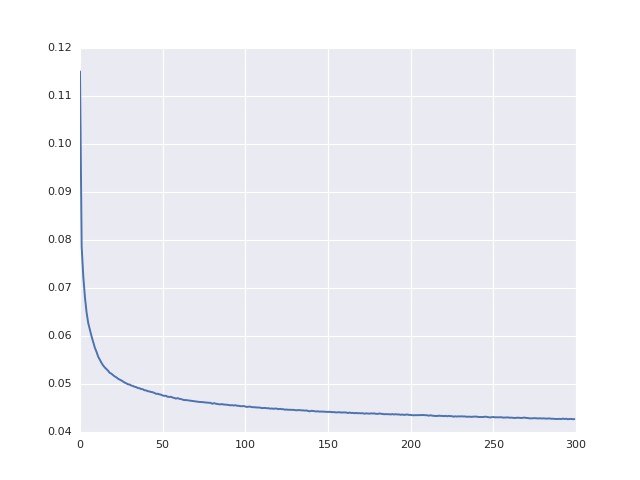

In [8]:
#plt.figure()
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
#plt.legend(['train', 'validation'], loc = 'upper left')

#plt.figure()
#plt.plot(history.history['mean_squared_error'])
#plt.plot(history.history['val_mean_squared_error'])

plt.figure()
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])


plt.show()

In [9]:
results = model.evaluate(x_test, y_test)

In [10]:
pred = model.predict(x_train[0].reshape(1,37))
np.set_printoptions(precision=1)
print(pred)

[[  9.6e-01   1.9e-03   9.3e-02   5.3e-04]]


In [11]:
print('Test accuracy: ' + str(results[1]))

IndexError: list index out of range

In [14]:
# Serialize model to JSON
model_json = model.to_json()
with open("./model/model.json", "w") as json_file:
    json_file.write(model_json)

In [15]:
# Serialize weights into new model
model.save_weights("./model/model.h5")

#predict()

Regression metrics
Mean Squared Error: mean_squared_error, MSE or mse
Mean Absolute Error: mean_absolute_error, MAE, mae
Mean Absolute Percentage Error: mean_absolute_percentage_error, MAPE, mape
Cosine Proximity: cosine_proximity, cosine

In [ ]:
# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate


model = Sequential()
model.add(Dense(34, input_dim=34, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=28, callbacks=callbacks_list, verbose=2)

In [ ]:
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)